# Setup
Questo notebook serve per vedere che tutto sia installato correttamente nel sistema di Colab.
## Abilitare la GPU in Colab
Affinché Tensorflow usi l'accelerazione GPU, è necessario attivarla nel menu
`Runtime -> Cambia tipo di Runtime -> Accelerazione hardware (GPU)`

In [1]:
import tensorflow as tf

In [2]:
# Importing methods to retrieve and parse some datasets
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
# Retrieving and parsing the data (we use MNIST)
num_classes = 10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test_categorical) = mnist.load_data()

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test_categorical, num_classes)

# Normalizing the data between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# Retrieving the model object
from tensorflow.keras.models import Sequential
# And the layers object
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Reshape, Input
# And an additional metric to evaluate the model
from tensorflow.keras.metrics import AUC

In [5]:
# Creating and compiling the model
model = Sequential([
    Input(shape=x_train.shape[1:]),
    Reshape((*x_train.shape[1:], 1)),
    Conv2D(16, (10, 10), activation="relu", padding="same"),
    Conv2D(16, (10, 10), padding="same"),
    Activation("relu"),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
], name="Simple model for MNIST".replace(" ", "_"))

# Let's train the model using RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer="nadam", 
    metrics=['accuracy', AUC(curve="ROC", name="auroc"), AUC(curve="PR", name="auprc")]
)

model.summary()

Model: "Simple_model_for_MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        1616      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        25616     
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)   

In [6]:
# Training the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose=1
).history

Epoch 1/10
469/469 [==============================] - 41s 22ms/step - loss: 0.4930 - accuracy: 0.8418 - auroc: 0.9737 - auprc: 0.9077 - val_loss: 0.0690 - val_accuracy: 0.9769 - val_auroc: 0.9994 - val_auprc: 0.9974
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0758 - accuracy: 0.9776 - auroc: 0.9988 - auprc: 0.9958 - val_loss: 0.0353 - val_accuracy: 0.9875 - val_auroc: 0.9998 - val_auprc: 0.9991
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0587 - accuracy: 0.9832 - auroc: 0.9990 - auprc: 0.9965 - val_loss: 0.0337 - val_accuracy: 0.9883 - val_auroc: 0.9999 - val_auprc: 0.9992
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0452 - accuracy: 0.9862 - auroc: 0.9995 - auprc: 0.9980 - val_loss: 0.0282 - val_accuracy: 0.9898 - val_auroc: 0.9998 - val_auprc: 0.9993
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0354 - accuracy: 0.9889 - auroc: 0.9996 - auprc: 0.9986 - val_

In [11]:
# install `plot_keras_history`
print ("Installing plot_keras_history...")
!pip install plot_keras_history &> /dev/null && echo "Done!"

installing plot_keras_history...
Done!


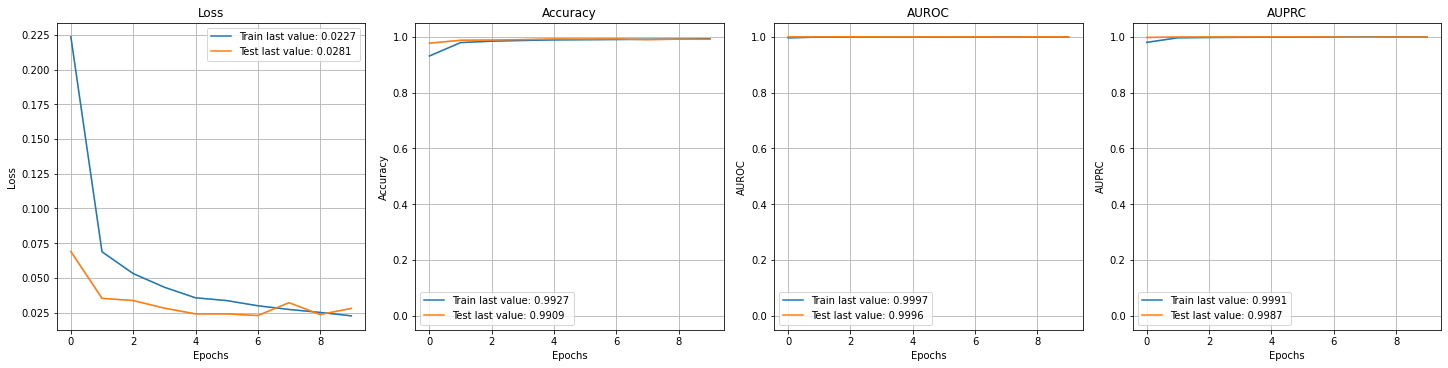

In [9]:
import matplotlib.pyplot as plt
from plot_keras_history import plot_history
plot_history(history)
plt.show()